#### Evaluation - Comparing Our Models 

The purpose of this notebook is to compare how our models performed across genre and model architecture.\
 This notebook should be run as-is, as it does not have customizable parameters.

In [47]:
# imports 
import matplotlib.pyplot as plt
import numpy as np
import nltk
import syllables
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from textblob import TextBlob as tb

In [48]:
# constants - filepaths to txt files with sequences generated by our models 
NGRAM_COUNTRY_SEQS_PATH = "generated_txts/ngram_country.txt"
NGRAM_METAL_SEQS_PATH = "generated_txts/ngram_metal.txt"

LSTM_COUNTRY_SEQS_PATH = "generated_txts/lstm_country.txt"
LSTM_METAL_SEQS_PATH = "generated_txts/lstm_metal.txt"

GPT2_COUNTRY_SEQS_PATH = "generated_txts/gpt2_country.txt"
GPT2_METAL_SEQS_PATH = "generated_txts/gpt2_metal.txt"

##### Perplexity Across Models and Genres on Test Dataset 

In [49]:
# created with reference to matplotlib documentation https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
def create_grouped_barchart(country_data: tuple, metal_data: tuple, title: str, ylabel: str):
    """ 
    Creates a grouped bar chart comparing the Ngram, RNN and GPT2 models across the country and heavy metal genres.
    Will create two bargraphs for each type of model: one for country, another for heavy metal
    
    Args:
        country_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the country genre
        metal_data (tuple): A tuple of numbers in the format (Ngram metric, RNN metric, GPT2 metric) for the heavy metal genre
        title (str): title for the barchart
        ylabel (str): y-axis label for the barchart 
    """
    models = ("N-Gram", "RNN with LSTMs", "Fine-tuned GPT-2")
    genres = {
        'Country': country_data,
        'Heavy Metal': metal_data,
    }

    x = np.arange(len(models))  # label locations
    width = 0.25  # the width of the bars
    multiplier = .5

    fig, ax = plt.subplots(layout='constrained')

    for genre, value in genres.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, value, width, label=genre)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncols=3)

    # chatgpt code to add more whitespace above the tallest bar
    max_height = max(max(value) for value in genres.values())
    additional_space = (max_height * 20) / 100
    ax.set_ylim(top=max_height + additional_space)

    plt.show()

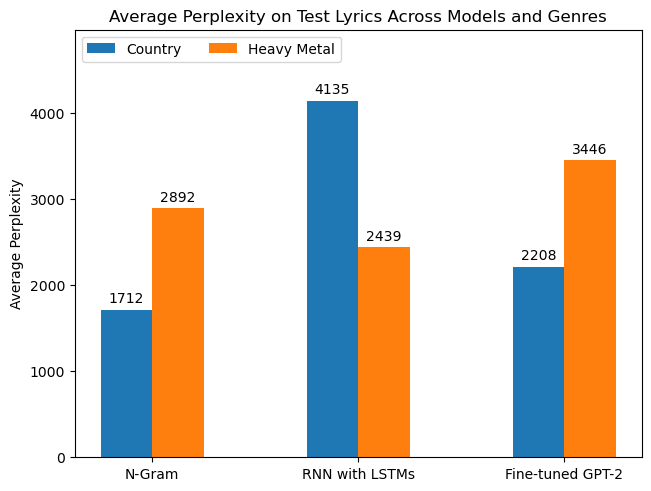

In [64]:
# copy and paste in mean perplexities on test data calculated for each model
country_perplexity = (1712, 4135, 2208)
metal_perplexity = (2892, 2439, 3446)
create_grouped_barchart(country_perplexity, metal_perplexity, 'Average Perplexity on Test Lyrics Across Models and Genres', 'Average Perplexity')

From this graph, the RNN trained on country lyrics has the largest average test perplexity. Since these configurations performed well when trained on a very limited subset of the training data, it is possible that our experiments did not generalize well. One possibility for why the country RNN could have performed worse than the heavy metal RNN is that the country model uses sentence length 10 (as opposed to 5 for the metal model). This means the vocabulary of the country RNN is larger, so probability mass can be distributed over more tokens when predicting the next token, making the model less sure of the true next token.


To amend this in the future, we should perform more experiments with the same amount of data as we intend our final model to be. This will make our average validation perplexities more comparable to our average test perplexities, helping us make better decisions amount hyperparameter configurations.

Otherwise, heavy metal models seem to have higher perplexities than country models. This may be because our the vocabulary of our metal training set is larger than the vocabulary of our country training set.

#### Assessing the Generated Sequences 

In [51]:
def read_lines(filepath: str) -> list:
    """
    Reads from the provided filepath and produces a list of strings, 
    each element in the list corresponding to a line in the txt file.
    """   
    lines = []

    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Remove trailing newline characters from each line
    lines = [line.strip() for line in lines]

    return lines 

In [52]:
# sequences generated by our models
ngram_country_seqs = read_lines(NGRAM_COUNTRY_SEQS_PATH)
ngram_metal_seqs = read_lines(NGRAM_METAL_SEQS_PATH)

lstm_country_seqs = read_lines(LSTM_COUNTRY_SEQS_PATH)
lstm_metal_seqs = read_lines(LSTM_METAL_SEQS_PATH)

gpt2_country_seqs = read_lines(GPT2_COUNTRY_SEQS_PATH)
gpt2_metal_seqs = read_lines(GPT2_METAL_SEQS_PATH)

##### Sample Sequences 

Purpose of this section is to show examples of the lines generated by each model to give context to the perplexities above.

In [53]:
print("N-Gram Model, Country:")
print("\n".join(ngram_country_seqs[:10]))

N-Gram Model, Country:
i wind up is where the ocean
we do this every night
there 's ever found you
,  401
on a pocket watch , stole a hundred proof , your , i just got honest ?
and that sort of thing
like me ?
but i 'm gon na take it on your heels on the river
well lay it all together , forever
not knowing if you ever have you ever could 've been down and love was burning like a new song


In [54]:
print("N-Gram Model, Heavy Metal:")
print("\n".join(ngram_metal_seqs[:10]))

N-Gram Model, Heavy Metal:
as i lay my sword to whirl and slaughter
unjustifiable existence
just leave me alone ,
that you require
i watched from the start
some run screaming
it 's eastmann time ''
with the guts
that 's how it goes !
slaughtering my dreams ; they 're  through your eyes a picture


In [55]:
print("RNN + LSTMs Model, Country:")
print("\n".join(lstm_country_seqs[:10]))

RNN + LSTMs Model, Country:
i ought to you and try try mind you 'll never love you never denied leave me runnin ' playing
ever let get you work ai n't you good us ca n't borrow two kinds of what can love always giving love like nobody should give
why you say goodbye
else 's say how you hurry every minute
stars do going
it shall fill the right but i refused the man or never have .
what you do
you say when you lay me alone
you see the people left the people why you found another so kinda slow asleep up where roses on them party old set him said he thinks tried tried go on him who she cowboy shadowed schemes low let her stand of anything that moon and our prayers are still drinkin ' 'round world we never have been given
ought say that it makes love you can do anything try hang another word never 've failed cause somehow me walk back in vain the way i feel it could scream for anything on your mini-skirt 'cause you folks are gone so close on liftin ' again . her but love has often i know re

In [56]:
print("RNN + LSTMs Model, Heavy Metal:")
print("\n".join(lstm_metal_seqs[:10]))

RNN + LSTMs Model, Heavy Metal:
frozen time , growing , slipping away in time i means to rest t.b.o hands of home disappearing venomous . me ...
s time immortal
time doing time
word spoken
made me believe in ancient of his name verbal the bad city under you get today like times may you flee his souls  dog with well bout friends friends when you 're ready for here we create it out for sunset and wasted
see your eyes into ashes to me people lead to light into darkness fly another world
out time passed sun glowing ended tight
heal me feel
show me seize
only god


In [57]:
print("GPT2 Model, Country:")
print("\n".join(gpt2_country_seqs[:10]))

GPT2 Model, Country:

you  been  just  a  different

,  the  man  that  i  could  get  back
to  make  it  together ,  take  a  lot  of
us  the  things  that  said ,  we 're  right
:  the  music
just  where  the  way  in  the  day
,  the  love  is  gone
the  angels  can  make  a  big  wind


In [58]:
print("GPT2 Model, Heavy Metal:")
print("\n".join(gpt2_metal_seqs[:10]))

GPT2 Model, Heavy Metal:
to  kill  a  demon from  your  breath,
i  see ,  how  we  all  all
the  sign
to  destroy  my  soul
at  glory
to  kill  me  for  the  same  side
now !
to  kill  this  one  and  i 'm
,  all  my  pain
,  not ,  so  nice ,


##### Average Line Length

In [59]:
def avg_tokens_per_line(lines: list):
    """ 
    Computes the average number of tokens per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of tokens in the lines 
    """
    num_tokens = [len(nltk.word_tokenize(line)) for line in lines]
    return np.mean(num_tokens)

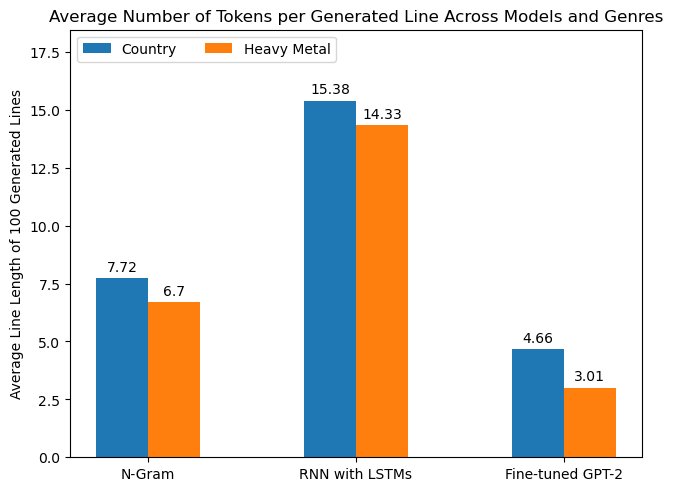

In [60]:
country_line_lengths = (avg_tokens_per_line(ngram_country_seqs), avg_tokens_per_line(lstm_country_seqs), avg_tokens_per_line(gpt2_country_seqs))
metal_line_lengths = (avg_tokens_per_line(ngram_metal_seqs), avg_tokens_per_line(lstm_metal_seqs), avg_tokens_per_line(gpt2_metal_seqs))
create_grouped_barchart(country_line_lengths, metal_line_lengths, 'Average Number of Tokens per Generated Line Across Models and Genres', 'Average Line Length of 100 Generated Lines')

Bases on these lengths, the N-Gram and GPT-2 models may be able to produce lyric lines of sensible length, but RNNs will produce lines that are too long. In the future, this may be solved by testing more padding/truncation strategies. For RNNs, chose to pad on the left because padding on the right led to excessive pad token generation. We also chose to truncate on the right because left truncation led to very short or sometimes empty lines being generation. That being said, the excessive line length from our RNNs indicates that there is likely a more accurate strategy that we have yet to try.

##### Average Syllables per Line 

In [61]:
def avg_syllables_per_line(lines: list):
    """ 
    Computes the average number of syllables per line in the given list of lines 

    Args:
        lines (list): list of strings, where each string is a lyric line 

    Returns:
        Average number of syllables in the lines 
    """
    num_syllables = [syllables.estimate(line) for line in lines]
    return np.mean(num_syllables)

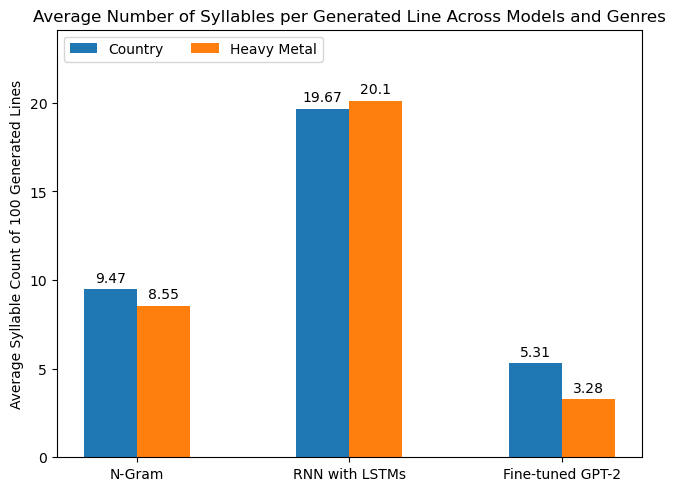

In [62]:
country_num_syllables = (avg_syllables_per_line(ngram_country_seqs), avg_syllables_per_line(lstm_country_seqs), avg_syllables_per_line(gpt2_country_seqs))
metal_num_syllables = (avg_syllables_per_line(ngram_metal_seqs), avg_syllables_per_line(lstm_metal_seqs), avg_syllables_per_line(gpt2_metal_seqs),)
create_grouped_barchart(country_num_syllables, metal_num_syllables, 'Average Number of Syllables per Generated Line Across Models and Genres', 'Average Syllable Count of 100 Generated Lines')

##### Most Characteristic Tokens for Each Model

The purpose of this metric is to see if certain genres and models tend to produce particular words more often than others.\
(What particular words have the models learned are important for the genre?)\
As this is not the main focus of our evaluation, but rather a nice-to-have, we are using code from https://stevenloria.com/tf-idf/

In [63]:
# citation: https://stevenloria.com/tf-idf/

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)


documents = [ngram_country_seqs, lstm_country_seqs, gpt2_country_seqs, ngram_metal_seqs, lstm_metal_seqs, gpt2_metal_seqs]
document_labels = ["N-Gram Country",  "RNN + LSTM Country", "GPT2 Country", "N-Gram Heavy Metal", "RNN + LSTM Heavy Metal", "GPT2 Heavy Metal"]

# represent each document with a string containing all sequences 
documents_as_blobs = [tb(' '.join(doc)) for doc in documents]

bloblist = documents_as_blobs
for i, blob in enumerate(bloblist):
    print("Top words for", document_labels[i], "model")
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\t{}: TF-IDF {}".format(word, round(score, 5)))
    print()

Top words for N-Gram Country model
	dance: TF-IDF 0.003
	house: TF-IDF 0.003
	soon: TF-IDF 0.003
	hot: TF-IDF 0.003
	angel: TF-IDF 0.003

Top words for RNN + LSTM Country model
	why: TF-IDF 0.01263
	wanted: TF-IDF 0.00469
	tried: TF-IDF 0.00372
	said: TF-IDF 0.00329
	ought: TF-IDF 0.00298

Top words for GPT2 Country model
	happy: TF-IDF 0.00509
	tree: TF-IDF 0.00509
	man: TF-IDF 0.00469
	gone: TF-IDF 0.00375
	lose: TF-IDF 0.00321

Top words for N-Gram Heavy Metal model
	cunty: TF-IDF 0.00707
	ask: TF-IDF 0.00353
	empty: TF-IDF 0.00353
	starts: TF-IDF 0.00353
	far: TF-IDF 0.00334

Top words for RNN + LSTM Heavy Metal model
	fear: TF-IDF 0.00725
	skies: TF-IDF 0.00484
	bleed: TF-IDF 0.00484
	before: TF-IDF 0.00357
	rise: TF-IDF 0.00322

Top words for GPT2 Heavy Metal model
	pain: TF-IDF 0.01105
	reason: TF-IDF 0.00875
	kill: TF-IDF 0.00828
	baby: TF-IDF 0.00828
	–: TF-IDF 0.00828



Generally speaking, models trained on heavy metal songs tend to have darker characteristic words, whereas models trained on country songs have happier characteristic words